In [282]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import nasapy
import nasa
import seaborn as sns



from api_keys import api_key


In [104]:
Asteroids = pd.read_csv("Asteroid_dates.csv")
Asteroids

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,1/01/2019,Jan,1,3837557,(2019 AN),24.200,8.368577,1/01/2019,0.085909,0.038420,False,1.910837e+07,Earth
1,1/01/2019,Jan,1,3398654,(2007 YS56),25.700,6.461135,1/01/2019,0.043057,0.019256,False,1.798761e+07,Earth
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.900,15.429487,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
3,1/01/2019,Jan,1,3837538,(2018 YV2),24.200,11.718652,1/01/2019,0.085909,0.038420,False,1.022072e+07,Earth
4,1/01/2019,Jan,1,3771017,(2017 EV2),20.800,13.642474,1/01/2019,0.411188,0.183889,False,7.033567e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,31/12/2019,Dec,31,2006239,6239 Minos (1989 QF),18.500,9.007412,31/12/2019,1.185878,0.530341,True,6.346829e+07,Earth
5045,31/12/2019,Dec,31,3555072,(2011 AH5),26.000,17.980102,31/12/2019,0.037501,0.016771,False,4.341405e+07,Earth
5046,31/12/2019,Dec,31,3976544,(2020 AA2),27.000,9.714685,31/12/2019,0.023661,0.010582,False,1.643657e+06,Earth
5047,31/12/2019,Dec,31,3893722,(2019 WR4),26.065,4.236817,31/12/2019,0.036395,0.016276,False,4.493435e+06,Earth


In [105]:
Asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     5049 non-null   object 
 1   Month                    5049 non-null   object 
 2   Day                      5049 non-null   int64  
 3   ID                       5049 non-null   int64  
 4   Name                     5049 non-null   object 
 5   Absolute Magnitude       5049 non-null   float64
 6   Relative Velocity (k/s)  5049 non-null   float64
 7   Close Approach Date      5049 non-null   object 
 8   Estimated Max Diameter   5049 non-null   float64
 9   Estimated Min Diameter   5049 non-null   float64
 10  Potentially Hazardous?   5049 non-null   bool   
 11  Miss Distance (km)       5049 non-null   float64
 12  Orbiting Body            5049 non-null   object 
dtypes: bool(1), float64(5), int64(2), object(5)
memory usage: 478.4+ KB


In [106]:
Asteroids["ID"].nunique()

4510

In [186]:
min_all=Asteroids["Miss Distance (km)"].min()
min_all

12613.43417

In [107]:
Asteroids_by_ID=Asteroids.groupby('ID')
Asteroids_by_ID.head()

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,1/01/2019,Jan,1,3837557,(2019 AN),24.200,8.368577,1/01/2019,0.085909,0.038420,False,1.910837e+07,Earth
1,1/01/2019,Jan,1,3398654,(2007 YS56),25.700,6.461135,1/01/2019,0.043057,0.019256,False,1.798761e+07,Earth
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.900,15.429487,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
3,1/01/2019,Jan,1,3837538,(2018 YV2),24.200,11.718652,1/01/2019,0.085909,0.038420,False,1.022072e+07,Earth
4,1/01/2019,Jan,1,3771017,(2017 EV2),20.800,13.642474,1/01/2019,0.411188,0.183889,False,7.033567e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,31/12/2019,Dec,31,2006239,6239 Minos (1989 QF),18.500,9.007412,31/12/2019,1.185878,0.530341,True,6.346829e+07,Earth
5045,31/12/2019,Dec,31,3555072,(2011 AH5),26.000,17.980102,31/12/2019,0.037501,0.016771,False,4.341405e+07,Earth
5046,31/12/2019,Dec,31,3976544,(2020 AA2),27.000,9.714685,31/12/2019,0.023661,0.010582,False,1.643657e+06,Earth
5047,31/12/2019,Dec,31,3893722,(2019 WR4),26.065,4.236817,31/12/2019,0.036395,0.016276,False,4.493435e+06,Earth


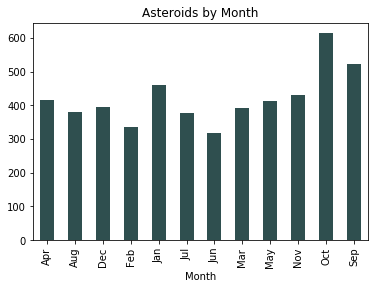

In [340]:
Asteroids_Months=Asteroids.groupby("Month")

ALL_count_2=Asteroids_Months["ID"].nunique()


Asteroids_Months_plot=ALL_count_2.plot(kind="bar", title="Asteroids by Month", color="darkslategray")
Asteroids_Months_plot.set_xlabel=("Month")
Asteroids_Months_plot.set_ylabel=("Asteroid count")
plt.savefig("figs/Asteroids by Month")

In [221]:
Haz_tru= Asteroids.loc[Asteroids["Potentially Hazardous?"]== True].count()
Haz_tru
Haz_false= Asteroids.loc[Asteroids["Potentially Hazardous?"]== False].count()
Haz_false

Date                       4588
Month                      4588
Day                        4588
ID                         4588
Name                       4588
Absolute Magnitude         4588
Relative Velocity (k/s)    4588
Close Approach Date        4588
Estimated Max Diameter     4588
Estimated Min Diameter     4588
Potentially Hazardous?     4588
Miss Distance (km)         4588
Orbiting Body              4588
dtype: int64

In [224]:
Haz_tru=461
Haz_false=4588

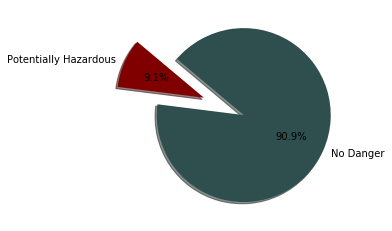

In [341]:
labels = ["Potentially Hazardous", "No Danger"]

# The values of each section of the pie chart
sizes = [461, 4588]

# The colors of each section of the pie chart
colors = ["maroon", "darkslategray"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (.5, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.savefig("figs/Hazardous_pie")

973     True
980     True
1087    True
1127    True
1234    True
        ... 
5015    True
5017    True
5030    True
5032    True
5042    True
Length: 539, dtype: bool

In [108]:
single_asteroid=Asteroids.drop_duplicates("ID",keep='first')
single_asteroid.count()

Date                       4510
Month                      4510
Day                        4510
ID                         4510
Name                       4510
Absolute Magnitude         4510
Relative Velocity (k/s)    4510
Close Approach Date        4510
Estimated Max Diameter     4510
Estimated Min Diameter     4510
Potentially Hazardous?     4510
Miss Distance (km)         4510
Orbiting Body              4510
dtype: int64

In [109]:
Asteroids.count()

Date                       5049
Month                      5049
Day                        5049
ID                         5049
Name                       5049
Absolute Magnitude         5049
Relative Velocity (k/s)    5049
Close Approach Date        5049
Estimated Max Diameter     5049
Estimated Min Diameter     5049
Potentially Hazardous?     5049
Miss Distance (km)         5049
Orbiting Body              5049
dtype: int64

Date                       409
Month                      409
Day                        409
ID                         409
Name                       409
Absolute Magnitude         409
Relative Velocity (k/s)    409
Close Approach Date        409
Estimated Max Diameter     409
Estimated Min Diameter     409
Potentially Hazardous?     409
Miss Distance (km)         409
Orbiting Body              409
dtype: int64

In [110]:
Pos_Hazard=single_asteroid.loc[single_asteroid["Potentially Hazardous?"] == True]
Pos_Hazard

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.9,15.429487,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
8,1/01/2019,Jan,1,2527715,527715 (2007 YQ56),19.9,15.429488,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
32,3/01/2019,Jan,3,2357022,357022 (1999 YG3),19.0,25.901881,3/01/2019,0.941976,0.421265,True,4.865035e+07,Earth
38,4/01/2019,Jan,4,3263453,(2004 XP14),19.4,17.176591,4/01/2019,0.783502,0.350393,True,1.093730e+07,Earth
55,5/01/2019,Jan,5,2267729,267729 (2003 FC5),18.3,13.317079,5/01/2019,1.300289,0.581507,True,3.724010e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,26/12/2019,Dec,26,2310442,310442 (2000 CH59),19.9,12.273016,26/12/2019,0.622358,0.278327,True,7.291408e+06,Earth
4990,27/12/2019,Dec,27,2267221,267221 (2001 AD2),19.7,25.924487,27/12/2019,0.682402,0.305179,True,2.097858e+07,Earth
4996,28/12/2019,Dec,28,2136849,136849 (1998 CS1),17.6,32.012844,28/12/2019,1.794899,0.802703,True,6.997161e+07,Earth
5003,28/12/2019,Dec,28,3893728,(2019 WX4),21.0,17.719711,28/12/2019,0.375008,0.167708,True,4.165681e+07,Earth


In [310]:
Pos_Hazard["ID"].nunique()

409

In [111]:
mean_mag=Pos_Hazard["Absolute Magnitude"].mean()
mean_Rvel=Pos_Hazard["Relative Velocity (k/s)"].mean()

<BarContainer object of 409 artists>

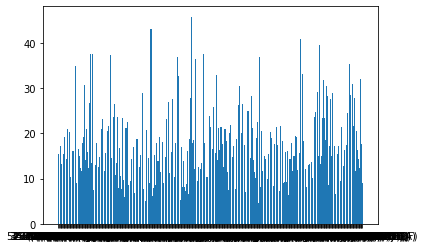

In [112]:
plt.bar(Pos_Hazard["Name"], Pos_Hazard["Relative Velocity (k/s)"])

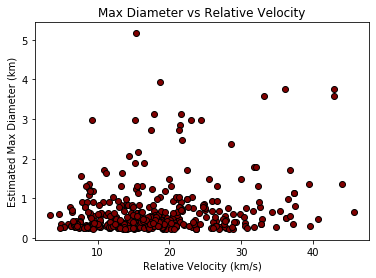

In [342]:
plt.scatter(Pos_Hazard["Relative Velocity (k/s)"], Pos_Hazard["Estimated Max Diameter"], color="maroon", edgecolors="black")
plt.xlabel("Relative Velocity (km/s)")
plt.ylabel("Estimated Max Diameter (km)")
plt.title("Max Diameter vs Relative Velocity")
plt.savefig("figs/Max Diameter vs Relative Velocity")

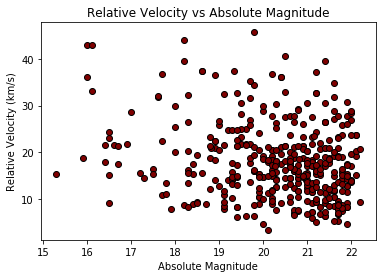

In [343]:
plt.scatter(Pos_Hazard["Absolute Magnitude"], Pos_Hazard["Relative Velocity (k/s)"], color="maroon", edgecolors="black")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Relative Velocity (km/s)")
plt.title("Relative Velocity vs Absolute Magnitude")
plt.savefig("figs/Relative Velocity vs Absolute Magnitude")

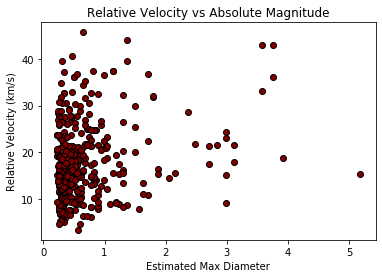

In [344]:
plt.scatter(Pos_Hazard["Estimated Max Diameter"], Pos_Hazard["Relative Velocity (k/s)"], color="maroon", edgecolors="black")
plt.xlabel("Estimated Max Diameter")
plt.ylabel("Relative Velocity (km/s)")
plt.title("Relative Velocity vs Absolute Magnitude")
plt.savefig("figs/Relative Velocity vs Absolute Magnitude")

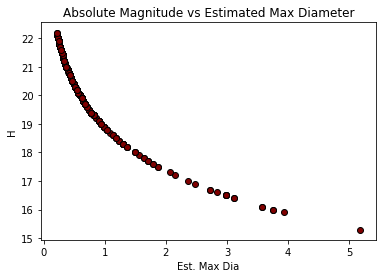

In [347]:
plt.scatter(Pos_Hazard["Estimated Max Diameter"], Pos_Hazard["Absolute Magnitude"], color="maroon", edgecolors="black")
plt.ylabel("H")
plt.xlabel("Est. Max Dia")

plt.title("Absolute Magnitude vs Estimated Max Diameter")
plt.savefig("figs/Absolute Magnitude vs Estimated Max Diameter")

In [118]:
Pos_Hazard

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.9,15.429487,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
8,1/01/2019,Jan,1,2527715,527715 (2007 YQ56),19.9,15.429488,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
32,3/01/2019,Jan,3,2357022,357022 (1999 YG3),19.0,25.901881,3/01/2019,0.941976,0.421265,True,4.865035e+07,Earth
38,4/01/2019,Jan,4,3263453,(2004 XP14),19.4,17.176591,4/01/2019,0.783502,0.350393,True,1.093730e+07,Earth
55,5/01/2019,Jan,5,2267729,267729 (2003 FC5),18.3,13.317079,5/01/2019,1.300289,0.581507,True,3.724010e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,26/12/2019,Dec,26,2310442,310442 (2000 CH59),19.9,12.273016,26/12/2019,0.622358,0.278327,True,7.291408e+06,Earth
4990,27/12/2019,Dec,27,2267221,267221 (2001 AD2),19.7,25.924487,27/12/2019,0.682402,0.305179,True,2.097858e+07,Earth
4996,28/12/2019,Dec,28,2136849,136849 (1998 CS1),17.6,32.012844,28/12/2019,1.794899,0.802703,True,6.997161e+07,Earth
5003,28/12/2019,Dec,28,3893728,(2019 WX4),21.0,17.719711,28/12/2019,0.375008,0.167708,True,4.165681e+07,Earth


In [157]:

#plt.pie(Asteroids["Potentially Hazardous?"])

In [181]:
mean_mag=Pos_Hazard["Absolute Magnitude"].mean()
mean_Rvel=Pos_Hazard["Relative Velocity (k/s)"].mean()
mean_dia=Pos_Hazard["Estimated Max Diameter"].mean()
mean_Rvel

17.922574975584343

In [187]:
max_mag=Pos_Hazard["Absolute Magnitude"].max()
max_Rvel=Pos_Hazard["Relative Velocity (k/s)"].max()
max_dia=Pos_Hazard["Estimated Max Diameter"].max()
min_miss_dis=Pos_Hazard["Miss Distance (km)"].min()
min_dia=Pos_Hazard["Estimated Max Diameter"].min()
min_miss_dis

1437917.792

In [210]:
PH_Table= {"Mean H": mean_mag,
           " Mean Relative Velocity (k/s)": mean_Rvel,
           "Mean Max Diameter (km)": mean_dia,
           "Max H": max_mag, 
           "Max Velocity (km/s)": max_Rvel, 
           "Max Diameter (km)": max_dia,
           "Min Diameter (km)": min_dia, 
           "Min Miss Distance (km)": min_miss_dis }

In [217]:
PH_Table_df=pd.DataFrame([PH_Table])

In [125]:
Largest_Asteroid=Pos_Hazard.loc[Pos_Hazard["Estimated Max Diameter"]== max_dia]
Largest_Asteroid

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
3080,31/08/2019,Aug,31,2001620,1620 Geographos (1951 RA),15.3,15.283542,31/08/2019,5.176545,2.315021,True,20533455.84,Earth


In [129]:
Closest_Asteroid=Pos_Hazard.loc[Pos_Hazard["Miss Distance (km)"]== min_miss_dis]
Closest_Asteroid

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
4422,13/11/2019,Nov,13,3888754,(2019 UN12),22.0,28.816397,13/11/2019,0.236614,0.105817,True,1437917.792,Earth


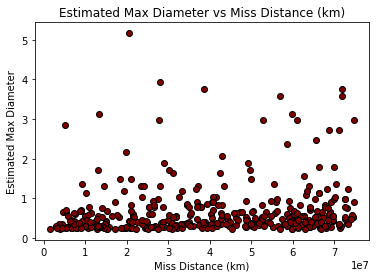

In [348]:
plt.scatter(Pos_Hazard["Miss Distance (km)"], Pos_Hazard["Estimated Max Diameter"], color="maroon", edgecolors="black")
plt.xlabel("Miss Distance (km)")
plt.ylabel("Estimated Max Diameter")
plt.title("Estimated Max Diameter vs Miss Distance (km)")
plt.savefig("figs/Estimated Max Diameter vs Miss Distance (km)")

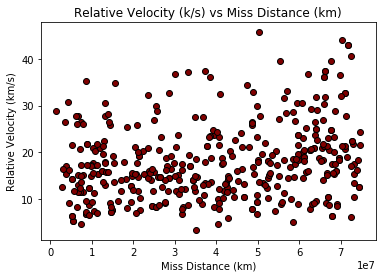

In [351]:
plt.scatter(Pos_Hazard["Miss Distance (km)"], Pos_Hazard["Relative Velocity (k/s)"], color="maroon", edgecolors="black")
plt.xlabel("Miss Distance (km)")
plt.ylabel("Relative Velocity (km/s)")
plt.title("Relative Velocity (k/s) vs Miss Distance (km)")
plt.savefig("figs/Relative Velocity (km_s) vs Miss Distance (km)")

In [160]:
Orbits=Asteroids.loc[Asteroids["Orbiting Body"] != "Earth"]
Orbits

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body


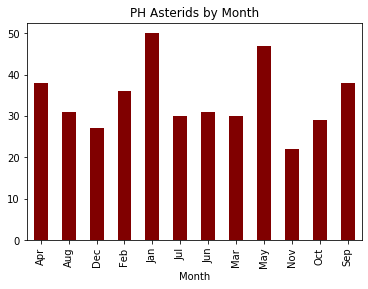

In [352]:
Asteroids_Months=Pos_Hazard.groupby("Month")

A_count=Asteroids_Months["ID"].nunique()


AbyMon=A_count.plot(kind="bar", title="PH Asterids by Month", color="maroon")

AbyMon.set_xlabel=("Month")
AbyMon.set_ylabel=("Asteroid count")
plt.savefig("figs/PH Asteroid count")

In [339]:
Month_rel_vol=Asteroids_Months["Relative Velocity (k/s)"]
Month_rel_vol


#plt.violinplot(Month_rel_vol) # positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None, data=None)

In [245]:
Month_rel_vol

Month
Apr    17.167924
Aug    16.643399
Dec    21.115822
Feb    17.029790
Jan    18.218766
Jul    19.654670
Jun    19.489563
Mar    15.456960
May    16.795694
Nov    17.416689
Oct    20.221738
Sep    17.140743
Name: Relative Velocity (k/s), dtype: float64

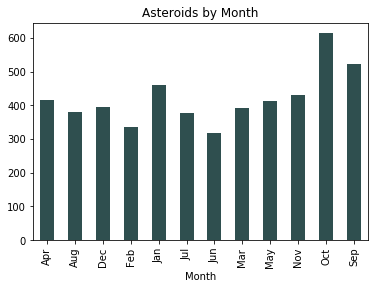

In [281]:
Asteroids_Months1=Asteroids.groupby("Month")

ALL_count_2=Asteroids_Months1["ID"].nunique()


Asteroids_Months_plot=ALL_count_2.plot(kind="bar", title="Asteroids by Month", color="darkslategray")
Asteroids_Months_plot.set_xlabel=("Month")
Asteroids_Months_plot.set_ylabel=("Asteroid count")
AbyMon.set_ylabel=("Asteroid count")


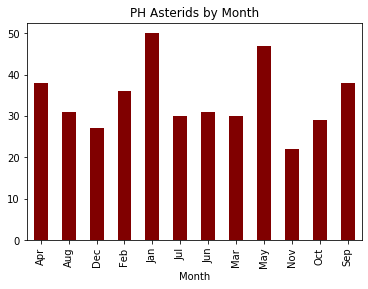

In [283]:
Asteroids_Months=Pos_Hazard.groupby("Month")

A_count=Asteroids_Months["ID"].nunique()


AbyMon=A_count.plot(kind="bar", title="PH Asterids by Month", color="maroon")

AbyMon.set_xlabel=("Month")
AbyMon.set_ylabel=("Asteroid count")

In [301]:
Months =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
As_Count = [411, 301,361,377,365,288,346,348,483,585,408,367]
PH_count = [50,36,30,38,47,31,30,31,38,29,22,27]
width=0.35

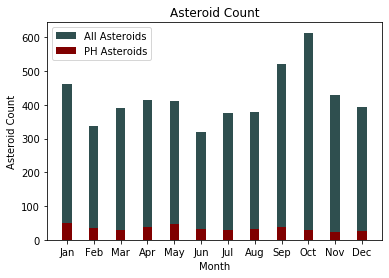

<Figure size 432x288 with 0 Axes>

In [353]:
fig, ax = plt.subplots()

ax.bar(Months, As_Count, width, label="All Asteroids", color="Darkslategray")
ax.bar(Months, PH_count, width, label="PH Asteroids" , color="maroon")
ax.set_ylabel("Asteroid Count")
ax.set_xlabel("Month")
ax.set_title("Asteroid Count")
ax.legend()
plt.show()

plt.savefig("figs/Asteroids_all")

In [364]:
samsies=Asteroids.duplicated("ID")
samsies=samsies.loc[samsies == True]

Asteroids["Duplicates"]= samsies

Duplicates = Asteroids.loc[Asteroids["Duplicates"] == True, :]
Dups_gups=Duplicates.groupby("ID")
CNT=Dups_gups.count()
CNT.loc[CNT["Date"]>1]

,Date,Month,Day,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body,Duplicates
ID,,,,,,,,,,,,,
2325395,2,2,2,2,2,2,2,2,2,2,2,2,2
2513170,2,2,2,2,2,2,2,2,2,2,2,2,2
2523605,2,2,2,2,2,2,2,2,2,2,2,2,2
2528859,2,2,2,2,2,2,2,2,2,2,2,2,2
2530520,2,2,2,2,2,2,2,2,2,2,2,2,2
3079950,2,2,2,2,2,2,2,2,2,2,2,2,2
3182829,2,2,2,2,2,2,2,2,2,2,2,2,2
3251512,2,2,2,2,2,2,2,2,2,2,2,2,2
3342249,2,2,2,2,2,2,2,2,2,2,2,2,2


In [366]:
most_frequent_PH= Asteroids.loc[Asteroids["ID"]== 54000953 ]
most_frequent_PH

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body,Duplicates
242,16/01/2019,Jan,16,54000953,(2020 CD3),31.672,2.132636,16/01/2019,0.002752,0.001231,False,162325.86620,Earth,NaN
1234,4/04/2019,Apr,4,54000953,(2020 CD3),31.672,7.768625,4/04/2019,0.002752,0.001231,False,13121.45357,Earth,True
2334,30/06/2019,Jun,30,54000953,(2020 CD3),31.672,1.556539,30/06/2019,0.002752,0.001231,False,276852.46040,Earth,True
3250,10/09/2019,Sep,10,54000953,(2020 CD3),31.672,1.471872,10/09/2019,0.002752,0.001231,False,301933.12670,Earth,True
4497,18/11/2019,Nov,18,54000953,(2020 CD3),31.672,1.540805,18/11/2019,0.002752,0.001231,False,289677.11180,Earth,True
